# Redes en NetworkX


"NetworkX es una libreria de Python para la creación, manipulación y estudio de la estructura, dinámica y funciones de redes complejas" (https://networkx.org/)

Se pueden seguir las instrucciones de instalación en: https://networkx.org/documentation/stable/install.html

Instalando con pip:

"$ pip install networkx[default]"

Se puede encontrar un tutorial en:

https://networkx.org/documentation/stable/tutorial.html#


## Generando gráficas


Importamos la libreria como "nx"


In [66]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

Comenzamos creando una gráfica "vacía", para ir agregando los vértices (nodos) y/o las aristas.


In [67]:
G = nx.Graph()

### Agregando nodos


Se pueden agregar nodos de forma individual:


In [68]:
G.add_node(1)
G.add_node(2)

O bien, agregar nodos de una lista:


In [69]:
G.add_nodes_from([3, 4, 5])

Veamos la lista de los vértices:


In [70]:
list(G.nodes())

[1, 2, 3, 4, 5]

Los nombres de los nodos pueden ser cadenas:


In [71]:
G.add_node('Nodo 6')

In [72]:
G.nodes

NodeView((1, 2, 3, 4, 5, 'Nodo 6'))

### Agregando aristas


Las aristas también se pueden agregar de forma individual o de una lista:


In [73]:
G.add_edge(1, 2)
# Como no es multigráfica, no agrega la arista (1,2) dos veces
G.add_edges_from([(1, 3), (2, 3), (1, 2), (1, 2)])

Veamos la lista de aristas:


In [74]:
list(G.edges())

[(1, 2), (1, 3), (2, 3)]

Se pueden agregar vértices nuevos al momento de agregar aristas:


In [75]:
G.add_edge(2, 7)
G.add_edge('Nodo 6', 4)
print("Los vértices de G son {}".format(list(G.nodes)))

Los vértices de G son [1, 2, 3, 4, 5, 'Nodo 6', 7]


### Para generar Digráficas y Multigráficas


Para generar una digráfica, se utiliza el comando DiGraph:


In [76]:
D = nx.DiGraph()
D.add_edges_from([(1, 2), (1, 3), (4, 2), (4, 3), (2, 1)])

Para generar una multigráfica, se utiliza el comando MultiGraph:


In [77]:
MG = nx.MultiGraph()
# Puesto que no es dirigida, no importa el orden
MG.add_edges_from([(1, 2), (2, 3), (2, 3), (1, 4), (4, 1)])

[0, 0, 1, 0, 1]

¿Y para las multigráficas dirigidas?


In [78]:
MD = nx.MultiDiGraph()
MD.add_edges_from([(1, 2), (2, 1), (2, 1), (2, 3), (4, 2)])

[0, 0, 1, 0, 0]

## Para visualizar gráficas


Se puede utilizar la función "draw()":


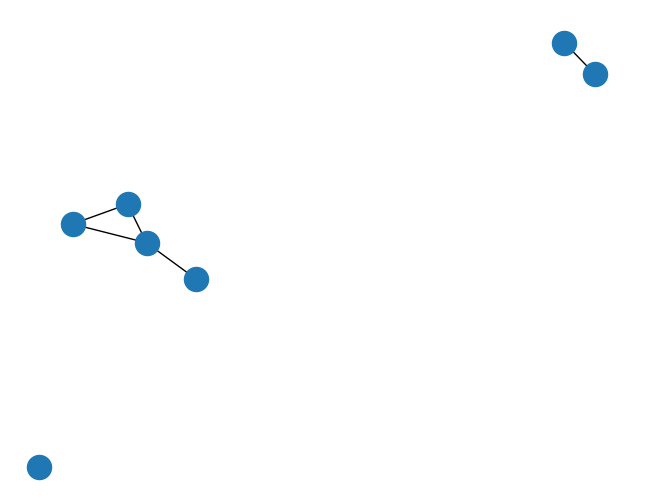

In [79]:
nx.draw(G)

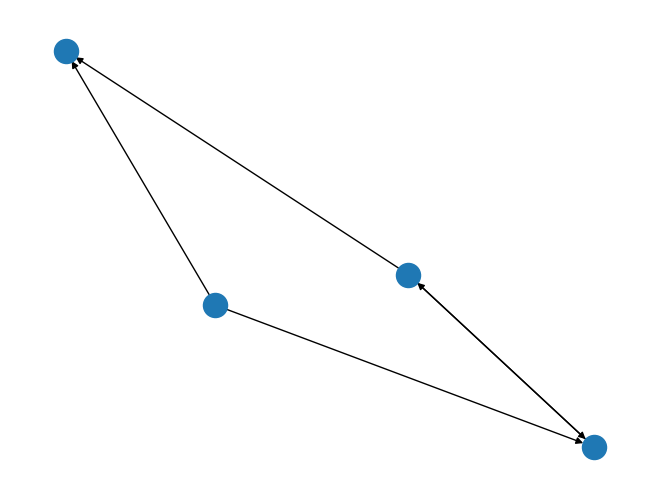

In [80]:
nx.draw(D)

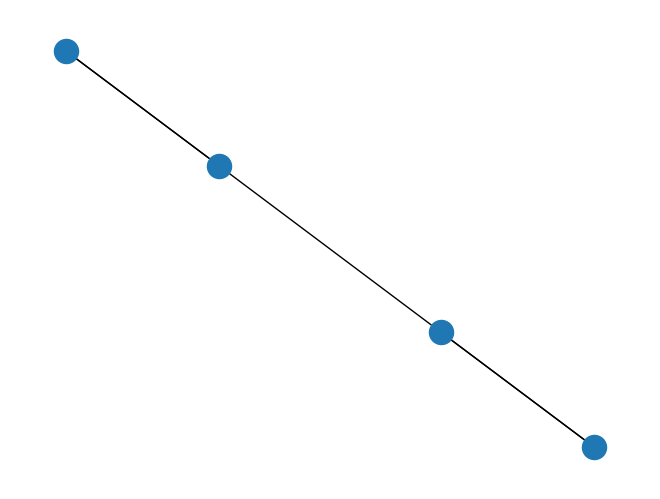

In [81]:
nx.draw(MG)

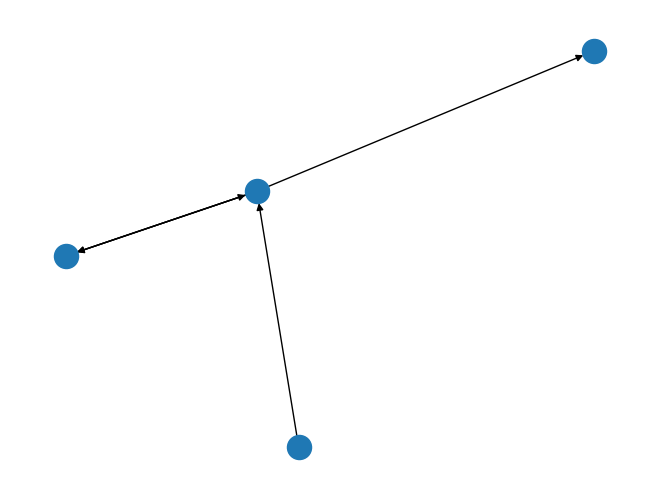

In [82]:
nx.draw(MD)

Para identificar los nodos se usa el argumento "with_labels=True". Se puede revisar la función "draw_networkx()" para ver el resto de argumentos posibles, como la forma y el color de los nodos: https://networkx.org/documentation/stable/reference/generated/networkx.drawing.nx_pylab.draw_networkx.html


c:\Users\herie\miniconda3\envs\a\Lib\site-packages\networkx\drawing\nx_pylab.py:1438: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  node_collection = ax.scatter(


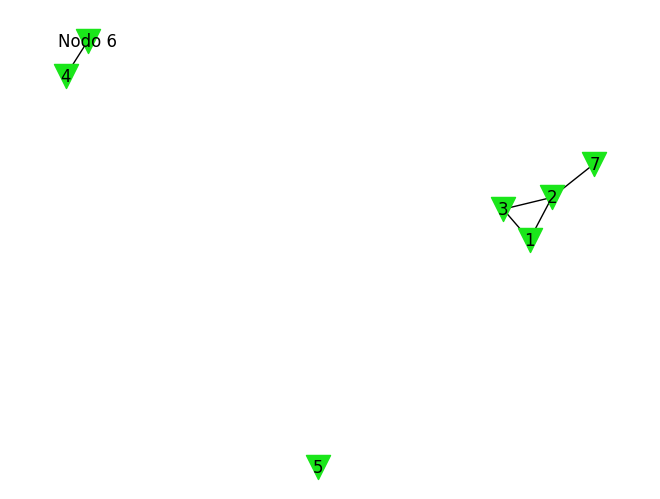

In [83]:
nx.draw(G, with_labels=True, node_color=(0.1, 0.9, 0.1), node_shape='v')

Se puede usar matplotlib para visualizar:


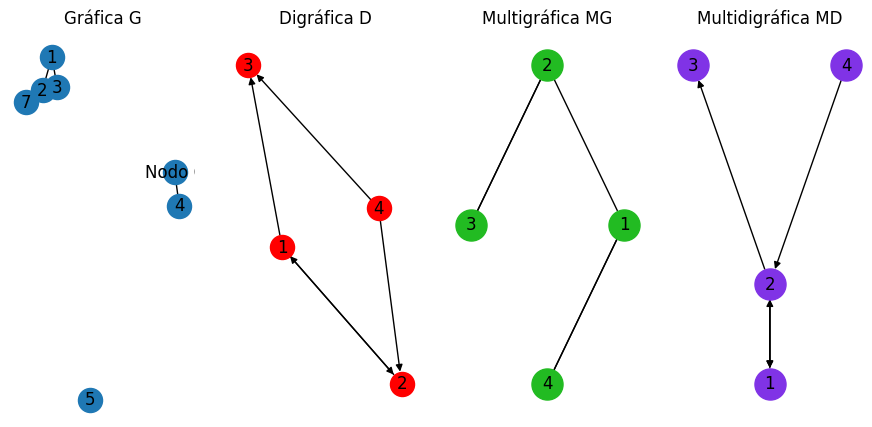

In [84]:
fig, axes = plt.subplots(1, 4)

fig.set_size_inches(11, 5)

nx.draw(G, ax=axes[0], with_labels=True)
axes[0].set_title("Gráfica G")

# se pueden usar distintos estilos de visualización: https://networkx.org/documentation/stable/reference/drawing.html
layout_D = nx.spring_layout(D)
nx.draw(D, layout_D, ax=axes[1], with_labels=True, node_color='red')
axes[1].set_title("Digráfica D")

layout_MG = nx.circular_layout(MG)
nx.draw(MG, layout_MG, ax=axes[2], with_labels=True,
        node_color='#22bb22', node_size=500)
axes[2].set_title("Multigráfica MG")

layout_MD = nx.spectral_layout(MD)
nx.draw(MD, layout_MD, ax=axes[3], with_labels=True,
        node_color=(0.5, 0.2, 0.9), node_size=500)
axes[3].set_title("Multidigráfica MD")

plt.show()

## Matriz de adyacencia


Se usa "nx.adjacency_matrix" y s obtiene un arreglo SciPy sparse: https://networkx.org/documentation/stable/reference/generated/networkx.linalg.graphmatrix.adjacency_matrix.html#networkx.linalg.graphmatrix.adjacency_matrix


In [85]:
A = nx.adjacency_matrix(G)
print(A.todense())

[[0 1 1 0 0 0 0]
 [1 0 1 0 0 0 1]
 [1 1 0 0 0 0 0]
 [0 0 0 0 0 1 0]
 [0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0]
 [0 1 0 0 0 0 0]]


In [86]:
B = nx.adjacency_matrix(D)
print(B.todense())

[[0 1 1 0]
 [1 0 0 0]
 [0 0 0 0]
 [0 1 1 0]]


Notemos que para redes dirigidas, la entrada ij=1 si hay una arista de i a j, por lo que hay que considerar la matriz transpuesta. Para ello, se puede usar Numpy y convertir la matriz.


In [87]:
import numpy as np

In [88]:
B = nx.to_numpy_array(D)
B

array([[0., 1., 1., 0.],
       [1., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 1., 1., 0.]])

In [89]:
BT = B.T
BT

array([[0., 1., 0., 0.],
       [1., 0., 0., 1.],
       [1., 0., 0., 1.],
       [0., 0., 0., 0.]])

In [90]:
C = nx.adjacency_matrix(MG)
print(C.todense())

[[0 1 0 2]
 [1 0 2 0]
 [0 2 0 0]
 [2 0 0 0]]


In [91]:
DD = nx.adjacency_matrix(MD)
print(DD.todense())

[[0 1 0 0]
 [2 0 1 0]
 [0 0 0 0]
 [0 1 0 0]]


Usando un arreglo Numpy podemos generar una red con la función nx.from_numpy_array():


In [92]:
A = np.array(
    [[0, 1, 1, 1, 0, 1],
     [0, 0, 1, 1, 0, 0],
     [0, 0, 0, 0, 0, 1],
     [0, 0, 0, 0, 0, 0],
     [0, 0, 0, 0, 0, 0],
     [0, 0, 0, 0, 0, 0]
     ]
)
A.T + A

array([[0, 1, 1, 1, 0, 1],
       [1, 0, 1, 1, 0, 0],
       [1, 1, 0, 0, 0, 1],
       [1, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [1, 0, 1, 0, 0, 0]])

In [93]:
G.clear()
G = nx.from_numpy_array(A)

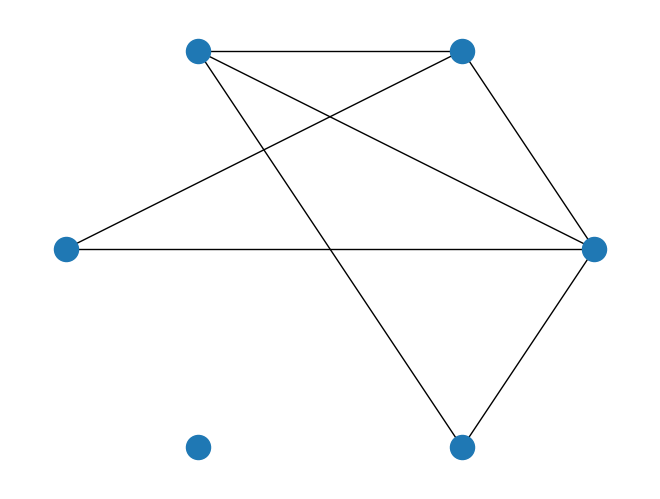

In [94]:
nx.draw_circular(G)

### Ejemplo


Veamos el siguiente ejemplo de una red familiar.


In [95]:
G.clear()

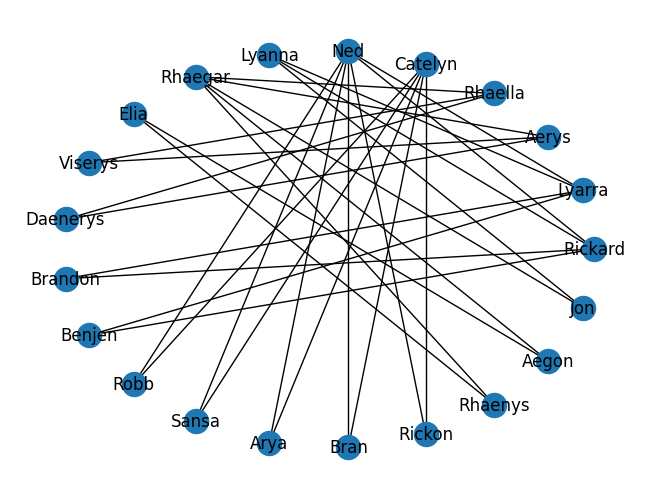

In [96]:
stark_targaryen = ['Rickard', 'Lyarra', 'Aerys', 'Rhaella', 'Catelyn', 'Ned', 'Lyanna', 'Rhaegar', 'Elia', 'Viserys', 'Daenerys',
                   'Brandon', 'Benjen', 'Robb', 'Sansa', 'Arya', 'Bran', 'Rickon', 'Rhaenys', 'Aegon', 'Jon']

parents = [('Rickard', 'Ned'), ('Rickard', 'Lyanna'), ('Rickard', 'Brandon'), ('Rickard', 'Benjen'),
           ('Lyarra', 'Ned'), ('Lyarra', 'Lyanna'), ('Lyarra',
                                                     'Brandon'), ('Lyarra', 'Benjen'),
           ('Aerys', 'Rhaegar'), ('Aerys', 'Viserys'), ('Aerys', 'Daenerys'),
           ('Rhaella', 'Rhaegar'), ('Rhaella', 'Viserys'), ('Rhaella', 'Daenerys'),
           ('Catelyn', 'Robb'), ('Catelyn', 'Sansa'), ('Catelyn',
                                                       'Arya'), ('Catelyn', 'Bran'), ('Catelyn', 'Rickon'),
           ('Ned', 'Robb'), ('Ned', 'Sansa'), ('Ned',
                                               'Arya'), ('Ned', 'Bran'), ('Ned', 'Rickon'),
           ('Rhaegar', 'Rhaenys'), ('Rhaegar',
                                    'Aegon'), ('Elia', 'Rhaenys'), ('Elia', 'Aegon'),
           ('Lyanna', 'Jon'), ('Rhaegar', 'Jon')]

G.add_nodes_from(stark_targaryen)
G.add_edges_from(parents)

layout = nx.circular_layout(G)
nx.draw(G, layout, with_labels=True)

In [97]:
A = nx.to_numpy_array(G)
A

array([[0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 1., 1., 0., 0., 0.,
        0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 1., 1., 0., 0., 0.,
        0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 1., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 1., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1.,
        1., 1., 0., 0., 0.],
       [1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1.,
        1., 1., 0., 0., 0.],
       [1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 1.],
       [0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 1., 1., 0.],
       [0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0.,

Para visualizar mejor las matrices de adyacencia y facilitar el análisis de la estructura de la red, utilizaremos la función plt.imshow()


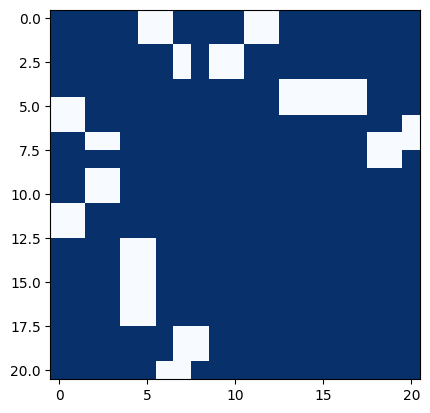

In [98]:
plt.imshow(A, cmap='Blues_r')

Las conexiones se muestran en color blanco.


## Grados


Se puede hacer un diccionario con los grados de los nodos usando la propiedad "degree":


In [99]:
G.degree

DegreeView({'Rickard': 4, 'Lyarra': 4, 'Aerys': 3, 'Rhaella': 3, 'Catelyn': 5, 'Ned': 7, 'Lyanna': 3, 'Rhaegar': 5, 'Elia': 2, 'Viserys': 2, 'Daenerys': 2, 'Brandon': 2, 'Benjen': 2, 'Robb': 2, 'Sansa': 2, 'Arya': 2, 'Bran': 2, 'Rickon': 2, 'Rhaenys': 2, 'Aegon': 2, 'Jon': 2})

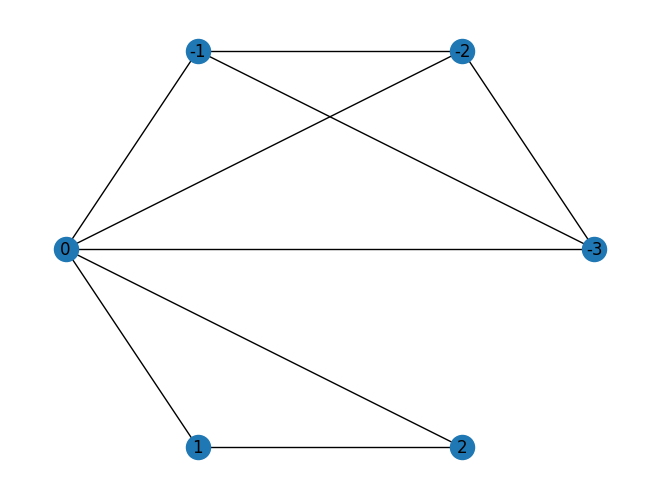

In [100]:
F = nx.Graph()

for i in range(-3, 3):
    for j in range(i+1, 3):
        if i*j >= 0:
            F.add_edge(i, j)

layout = nx.circular_layout(F)
nx.draw(F, layout, with_labels=True)

In [101]:
B = nx.to_numpy_array(F)
B

array([[0., 1., 1., 1., 0., 0.],
       [1., 0., 1., 1., 0., 0.],
       [1., 1., 0., 1., 0., 0.],
       [1., 1., 1., 0., 1., 1.],
       [0., 0., 0., 1., 0., 1.],
       [0., 0., 0., 1., 1., 0.]])

In [102]:
F.degree

DegreeView({-3: 3, -2: 3, -1: 3, 0: 5, 1: 2, 2: 2})

# Actividad

Define una función en NetworkX que construya los siguientes tipos de redes:

Trayectoria: Dado $n$, construir una trayectoria con $n$ nodos
Ciclo: Dado $n$, construir un ciclo con $n$ nodos
Anillo con $k$-vecinos: Dados $n$ y $k < n$, construir una red con $n$ nodos en un ciclo, de forma que cada nodo sea adyacente a $k$ nodos anteriores y sucesores a él. La figura siguiente es un anillo con $n = 10$ y $k = 3$.

Red completa: Dado $n$, construir la red completa $K_n$
Red Bipartira: Dados $m$ y $n$, construir la red bipartita completa $K_{m, n}$

Para cada una de las redes, visualiza la matriz de adyacencia (además, la matriz de incidencia para la bipartita).


In [ ]:
def matriz_adyacencia(G: nx.Graph, nodelist=None) -> np.ndarray:
    if nodelist is None:
        nodelist = list(G.nodes())
    return nx.to_numpy_array(G, nodelist=nodelist, dtype=int)


def mostrar_matriz(M: np.ndarray, titulo: str, xlabel: str = "j", ylabel: str = "i"):
    print(titulo)
    print(M)
    plt.figure(figsize=(5, 4))
    plt.imshow(M, aspect="equal", cmap="Blues_r")
    plt.title(titulo)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.colorbar()
    plt.show()

def mostrar_red_y_matrices(G: nx.Graph, titulo: str, nodelist=None, layout="circular"):
    if nodelist is None:
        nodelist = list(G.nodes())

    # Dibujo
    plt.figure(figsize=(5, 4))
    if layout == "circular":
        pos = nx.circular_layout(G)
    elif layout == "spring":
        pos = nx.spring_layout(G, seed=0)
    elif layout == "kamada":
        pos = nx.kamada_kawai_layout(G)
    elif layout == "bipartita":  
        pos = nx.bipartite_layout(G, align="vertical")
    else:
        pos = nx.spring_layout(G, seed=0)
    nx.draw(G, pos, with_labels=True, node_size=450)
    plt.title(titulo)
    plt.show()

    # Adyacencia
    A = matriz_adyacencia(G, nodelist=nodelist)
    mostrar_matriz(A, f"Matriz de adyacencia — {titulo}")

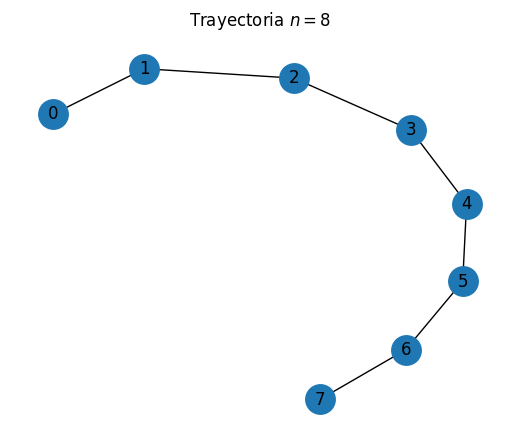

Matriz de adyacencia — Trayectoria $n=8$
[[0 1 0 0 0 0 0 0]
 [1 0 1 0 0 0 0 0]
 [0 1 0 1 0 0 0 0]
 [0 0 1 0 1 0 0 0]
 [0 0 0 1 0 1 0 0]
 [0 0 0 0 1 0 1 0]
 [0 0 0 0 0 1 0 1]
 [0 0 0 0 0 0 1 0]]


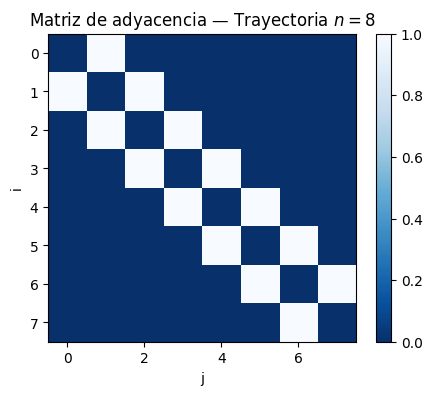

In [104]:
def trayectoria(n):
    M = np.zeros((n, n), dtype=int)

    for r in range(n - 1):
        M[r, r + 1] = 1

    G = nx.from_numpy_array(M + M.T)
    return G


G = trayectoria(n=8)
mostrar_red_y_matrices(G, "Trayectoria $n=8$", layout="spring")

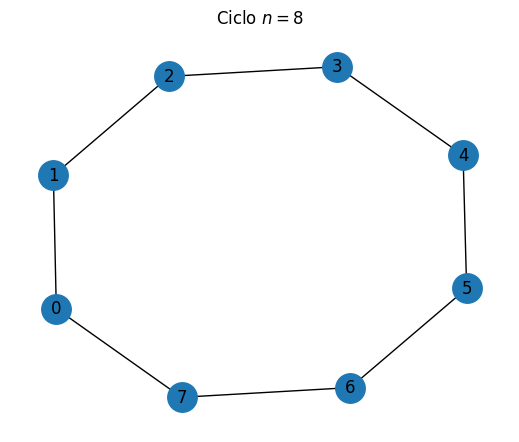

Matriz de adyacencia — Ciclo $n=8$
[[0 1 0 0 0 0 0 1]
 [1 0 1 0 0 0 0 0]
 [0 1 0 1 0 0 0 0]
 [0 0 1 0 1 0 0 0]
 [0 0 0 1 0 1 0 0]
 [0 0 0 0 1 0 1 0]
 [0 0 0 0 0 1 0 1]
 [1 0 0 0 0 0 1 0]]


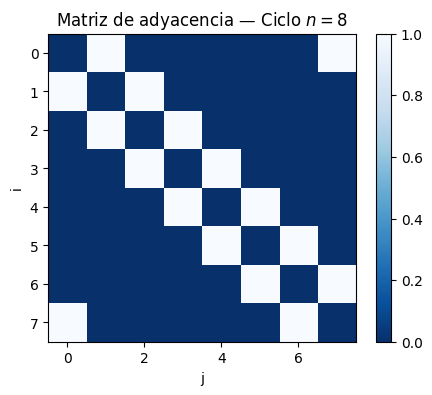

In [105]:
def ciclo(n):
    M = np.zeros((n, n), dtype=int)

    for r in range(n - 1):
        M[r, r + 1] = 1

    M[n-1, 0] = 1

    return nx.from_numpy_array(M + M.T)


G = ciclo(n=8)
mostrar_red_y_matrices(G, "Ciclo $n=8$", layout="spring")

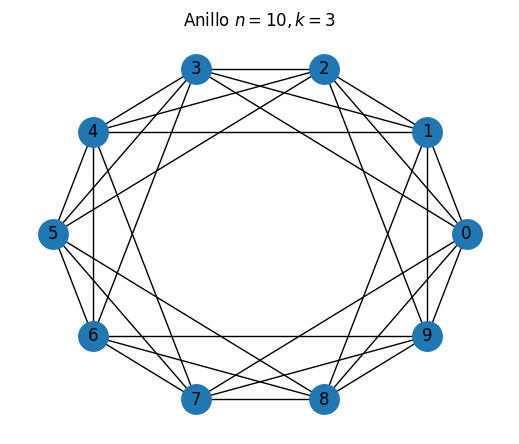

Matriz de adyacencia — Anillo $n=10, k=3$
[[0 1 1 1 0 0 0 1 1 1]
 [1 0 1 1 1 0 0 0 1 1]
 [1 1 0 1 1 1 0 0 0 1]
 [1 1 1 0 1 1 1 0 0 0]
 [0 1 1 1 0 1 1 1 0 0]
 [0 0 1 1 1 0 1 1 1 0]
 [0 0 0 1 1 1 0 1 1 1]
 [1 0 0 0 1 1 1 0 1 1]
 [1 1 0 0 0 1 1 1 0 1]
 [1 1 1 0 0 0 1 1 1 0]]


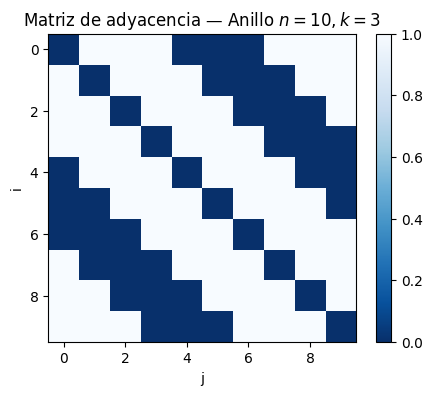

In [106]:
def anillo(n, k):
    M = np.zeros((n, n), dtype=int)

    for r in range(n):
        for r2 in range(k+1):
            if r2 == 0:
                continue
            M[r, (r+r2) % n] = 1

    return nx.from_numpy_array(M + M.T)


G = anillo(n=10, k=3)
mostrar_red_y_matrices(G, "Anillo $n=10, k=3$", layout="circular")

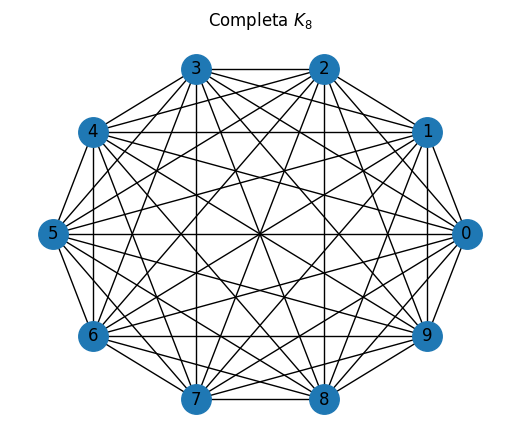

Matriz de adyacencia — Completa $K_8$
[[0 1 1 1 1 1 1 1 1 1]
 [1 0 1 1 1 1 1 1 1 1]
 [1 1 0 1 1 1 1 1 1 1]
 [1 1 1 0 1 1 1 1 1 1]
 [1 1 1 1 0 1 1 1 1 1]
 [1 1 1 1 1 0 1 1 1 1]
 [1 1 1 1 1 1 0 1 1 1]
 [1 1 1 1 1 1 1 0 1 1]
 [1 1 1 1 1 1 1 1 0 1]
 [1 1 1 1 1 1 1 1 1 0]]


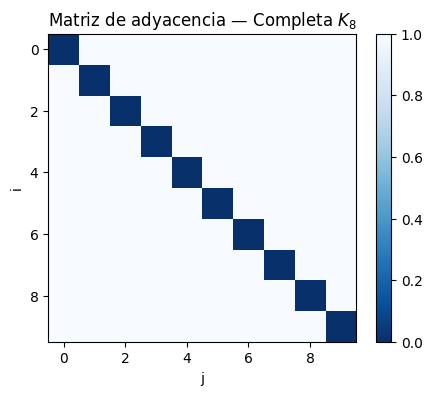

In [ ]:
def completa(n):
    M = np.ones((n, n), dtype=int)

    for r in range(n):
        M[r, r] = 0

    return nx.from_numpy_array(M)


G = completa(10)
mostrar_red_y_matrices(G, "Completa $K_8$", layout="circular")

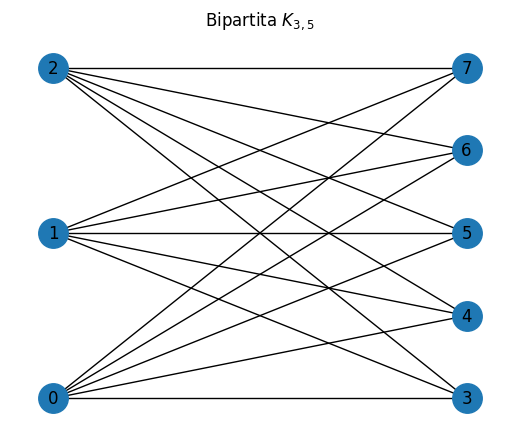

Matriz de adyacencia — Bipartita $K_{3,5}$
[[0 0 0 1 1 1 1 1]
 [0 0 0 1 1 1 1 1]
 [0 0 0 1 1 1 1 1]
 [1 1 1 0 0 0 0 0]
 [1 1 1 0 0 0 0 0]
 [1 1 1 0 0 0 0 0]
 [1 1 1 0 0 0 0 0]
 [1 1 1 0 0 0 0 0]]


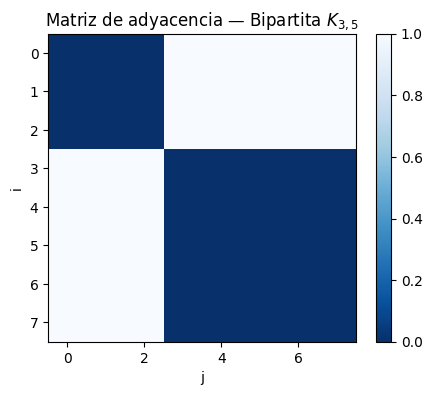

In [126]:
def bipartita(m, n):
    M = np.zeros((m + n, m + n), dtype=int)
    M[:m, m:] = 1
    M[m:, :m] = 1

    return nx.from_numpy_array(M)


G = bipartita(3, 5)
mostrar_red_y_matrices(G, titulo="Bipartita $K_{3,5}$", layout="bipartita")

In [128]:
def matriz_incidencia(G, oriented):

    nodelist = list(G.nodes())

    edgelist = list(G.edges())

    idx = {u: i for i, u in enumerate(nodelist)}
    B = np.zeros((len(nodelist), len(edgelist)))

    if oriented:
        for j, (u, v) in enumerate(edgelist):
            B[idx[u], j] = -1
            B[idx[v], j] = 1
    else:
        for j, (u, v) in enumerate(edgelist):
            B[idx[u], j] = 1
            B[idx[v], j] = 1

    return B, nodelist, edgelist


B, nodos, aristas = matriz_incidencia(G, oriented=False)
B_dir, _, _ = matriz_incidencia(G, oriented=True)

In [56]:
B

array([[1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1],
       [1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1]])

In [121]:
B_dir

array([[-1, -1, -1, -1, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, -1, -1, -1, -1, -1,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1, -1, -1, -1, -1],
       [ 1,  0,  0,  0,  0,  1,  0,  0,  0,  0,  1,  0,  0,  0,  0],
       [ 0,  1,  0,  0,  0,  0,  1,  0,  0,  0,  0,  1,  0,  0,  0],
       [ 0,  0,  1,  0,  0,  0,  0,  1,  0,  0,  0,  0,  1,  0,  0],
       [ 0,  0,  0,  1,  0,  0,  0,  0,  1,  0,  0,  0,  0,  1,  0],
       [ 0,  0,  0,  0,  1,  0,  0,  0,  0,  1,  0,  0,  0,  0,  1]])

In [122]:
B_dir @ B_dir.T

array([[ 5,  0,  0, -1, -1, -1, -1, -1],
       [ 0,  5,  0, -1, -1, -1, -1, -1],
       [ 0,  0,  5, -1, -1, -1, -1, -1],
       [-1, -1, -1,  3,  0,  0,  0,  0],
       [-1, -1, -1,  0,  3,  0,  0,  0],
       [-1, -1, -1,  0,  0,  3,  0,  0],
       [-1, -1, -1,  0,  0,  0,  3,  0],
       [-1, -1, -1,  0,  0,  0,  0,  3]])

In [118]:
print(nodos)
print(len(nodos))

[0, 1, 2, 3, 4, 5, 6, 7]
8


In [120]:
print(aristas)
print(len(aristas))

[(0, 3), (0, 4), (0, 5), (0, 6), (0, 7), (1, 3), (1, 4), (1, 5), (1, 6), (1, 7), (2, 3), (2, 4), (2, 5), (2, 6), (2, 7)]
15
